<a href="https://colab.research.google.com/github/CazabetLyon1/CN_analysis_class/blob/master/plot_centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:

g = nx.grid_2d_graph(3,3)
h = nx.grid_2d_graph(4,4)

h= nx.relabel_nodes(h,{n:"h1"+str(n) for n in h.nodes()})
g= nx.compose(g,h)

h = nx.grid_2d_graph(3,3)
h= nx.relabel_nodes(h,{n:"h2"+str(n) for n in h.nodes()})
g= nx.compose(g,h)

g.add_edge((0,0),"bridge")
g.add_edge("bridge","h1(0, 0)")
g.add_edge("bridge","h2(0, 0)")


g.add_edge((0,0),"hub")
g.add_edge((0,1),"hub")
g.add_edge("h1(2, 3)","hub")
g.add_edge("sing1","hub")
g.add_edge("sing2","hub")

g.add_edge("sing1","hub2")
g.add_edge("s1","hub2")
g.add_edge("s2","hub2")
g.add_edge("s3","hub2")
g.add_edge("s4","hub2")
g.add_edge("s5","hub2")
for i in range(1,5):
  g.add_edge("s"+str(i),"ch"+str(i)+"_1")
  g.add_edge("s"+str(i),"ch"+str(i)+"_2")

g.add_edge("sing2","hub3")
g.add_edge("s6","hub3")
g.add_edge("s7","hub3")
g.add_edge("s8","hub3")
g.add_edge("s9","hub3")
g.add_edge("s10","hub3")



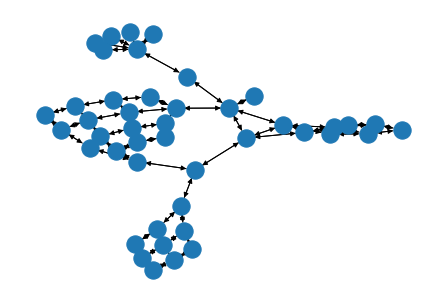

In [23]:
nx.draw(g)

In [17]:
#zkc = nx.erdos_renyi_graph(20,0.1,directed=True)
#zkc = nx.random_geometric_graph(20,0.4)
# g = nx.grid_2d_graph(10,10)
# g = nx.watts_strogatz_graph(40,4,0.1)
# g = nx.bfs_tree(g,0)
# g = g.reverse()


In [46]:
pos = nx.spring_layout(g,iterations=10000)

In [47]:
centralities = dict()
centralities["pagerank"] = nx.pagerank(g)
centralities["betweenness"] = nx.betweenness_centrality(g)
centralities["Clustering Coefficient"] = nx.clustering(g)
centralities["Katz"] = nx.katz_centrality(g,max_iter=1000)
centralities["Eigenvector"] = nx.eigenvector_centrality_numpy(g)
centralities["Degree"] = nx.degree(g)
centralities["Closeness"] = nx.closeness_centrality(g)
centralities["Harmonic"] =nx.harmonic_centrality(g)

node_order = g.nodes()


pagerank


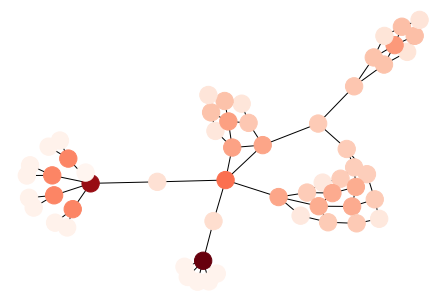

betweenness


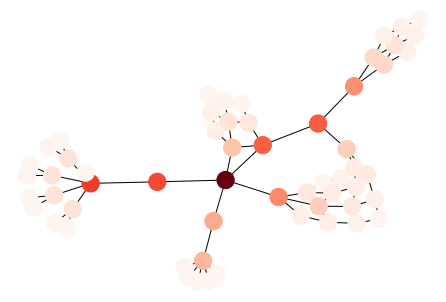

Clustering Coefficient


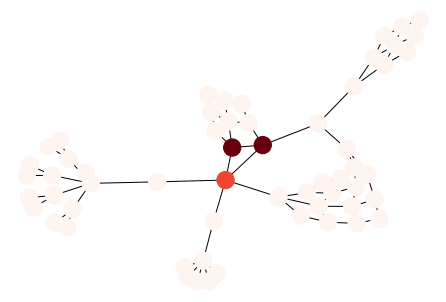

Katz


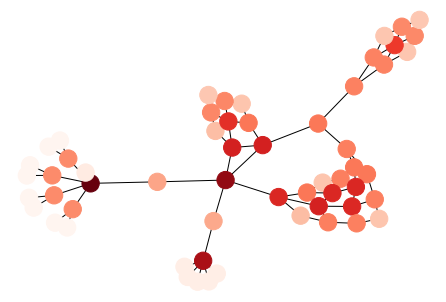

Eigenvector


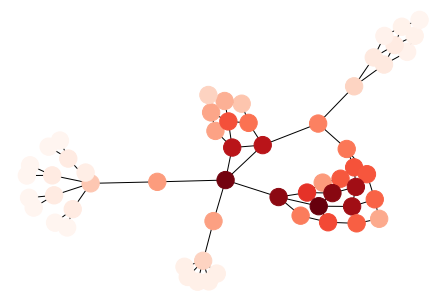

Degree


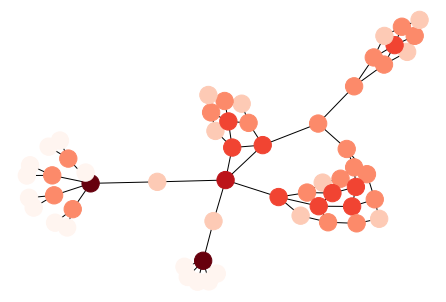

Closeness


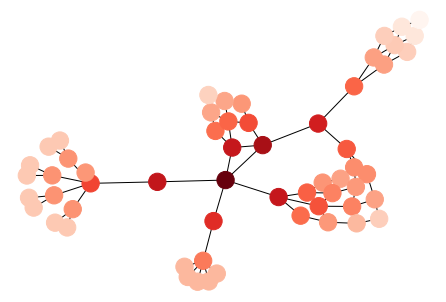

Harmonic


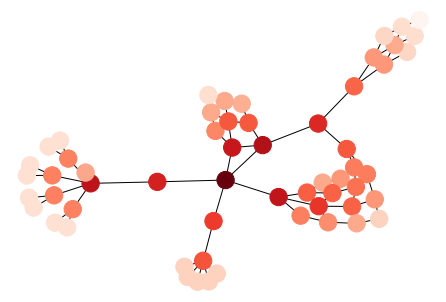

In [50]:
for name,centrality in centralities.items():
  print(name)
  nx.draw(g,pos=pos, node_color=[centrality[n] for n in node_order],cmap=plt.cm.Reds)
  plt.savefig("example"+name+".pdf")
  plt.show()

In [49]:
nx.draw(zkc,pos=pos, node_color=[deg[n] for n in node_order],cmap=plt.cm.Reds)

NameError: ignored

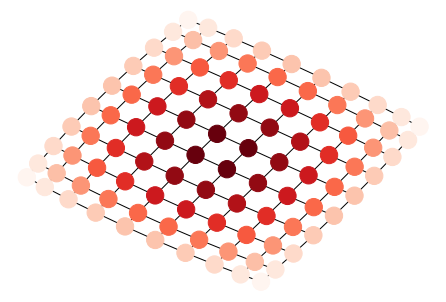

In [123]:
nx.draw(zkc,pos=pos, node_color=[eig[n] for n in node_order],cmap=plt.cm.Reds)

AttributeError: ignored

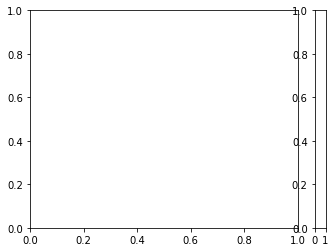

In [151]:
plt.colorbar(plt.cm.Reds(range(10)))